In [170]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tech_areas = pd.read_csv("data/3rd_block/industry_4_0_technological_areas_of_acquisitions.csv")

In [3]:
tech_areas.head()

,ITTER107,Territory,VARICT,Data type,ATECO_2007,NACE 2007,CLLVT,Size classes of persons employed,TIME,Select time,Value,Flag Codes,Flags
0,ITC,Nord-ovest,E_INV_IOT_PERC,Internet of things area,35,"total economic activities (c-n, including 951...",W_GE10,10 and over,2017,2017,11.04,NaN,NaN
1,ITC,Nord-ovest,E_INV_3D_PERC,3D printing area,35,"total economic activities (c-n, including 951...",W_GE10,10 and over,2017,2017,2.93,NaN,NaN
2,ITC,Nord-ovest,E_INV_ROB_PERC,robotic area,35,"total economic activities (c-n, including 951...",W_GE10,10 and over,2017,2017,4.78,NaN,NaN
3,ITC,Nord-ovest,E_INV_CC_PERC,cloud computing area,35,"total economic activities (c-n, including 951...",W_GE10,10 and over,2017,2017,18.24,NaN,NaN
4,ITC,Nord-ovest,E_INV_APP_PERC,web application area,35,"total economic activities (c-n, including 951...",W_GE10,10 and over,2017,2017,29.16,NaN,NaN


In [5]:
tech_areas = tech_areas.drop(["ITTER107", "VARICT", "ATECO_2007", "CLLVT", "Select time", "Flag Codes", "Flags"], axis=1)

In [182]:
tech_areas.head(10)

,Territory,Data type,NACE 2007,Size classes of persons employed,TIME,Value,Italy
0,Nord-ovest,Internet of things area,"total economic activities (c-n, including 951...",10 and over,2017,11.04,Italy
1,Nord-ovest,3D printing area,"total economic activities (c-n, including 951...",10 and over,2017,2.93,Italy
2,Nord-ovest,robotic area,"total economic activities (c-n, including 951...",10 and over,2017,4.78,Italy
3,Nord-ovest,cloud computing area,"total economic activities (c-n, including 951...",10 and over,2017,18.24,Italy
4,Nord-ovest,web application area,"total economic activities (c-n, including 951...",10 and over,2017,29.16,Italy
5,Nord-ovest,online sales area,"total economic activities (c-n, including 951...",10 and over,2017,10.20,Italy
6,Nord-ovest,social media area,"total economic activities (c-n, including 951...",10 and over,2017,16.30,Italy
7,Nord-ovest,Big Data Analytics area,"total economic activities (c-n, including 951...",10 and over,2017,5.08,Italy
8,Nord-ovest,augmented and virtual reality,"total economic activities (c-n, including 951...",10 and over,2017,1.10,Italy
9,Nord-ovest,IT security area,"total economic activities (c-n, including 951...",10 and over,2017,49.46,Italy


In [202]:
# Enterprises which had acquired goods/services in technological areas in the previous three years (percentages)
types = ['Internet of things area', '3D printing area', 'robotic area', 'cloud computing area', 'web application area', 'online sales area', 'social media area', 'Big Data Analytics area', 'augmented and virtual reality', 'IT security area']
tech_areas_acquired = tech_areas.loc[tech_areas['Data type'].isin(types)]

# Enterprises indicating the first five technological areas with greater impact on development in the two-year period, by indicated area (percentages)
tech_areas_impact = tech_areas.loc[~tech_areas['Data type'].isin(types)]

In [205]:
tech_areas_acquired["Italy"] = "Italy"
fig = px.treemap(tech_areas_acquired, path=['Italy', 'Territory', 'Data type'], color='Value',
                  color_continuous_scale='viridis', range_color=[0, max(tech_areas_acquired['Value'])],
                  color_continuous_midpoint=np.average(tech_areas_acquired['Value']),
                  width=1000, height=800)
fig.show()

In [208]:
x_data = list(tech_areas_acquired['Data type'].unique())

y_data = []
for territory in tech_areas_acquired['Territory'].unique():
    y_data.append(list(tech_areas_acquired.loc[tech_areas_acquired['Territory'] == territory]['Value']))

fig = go.Figure()

marker_colors = ['indianred', 'lightsalmon', 'rgb(20, 180, 0)', 'rgb(26, 118, 255)']

for index, values in enumerate(y_data):
    fig.add_trace(go.Bar(
        x=x_data,
        y=values,
        name=tech_areas_acquired['Territory'].unique()[index],
        marker_color=marker_colors[index]
    ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=800, height=600)
fig.show()

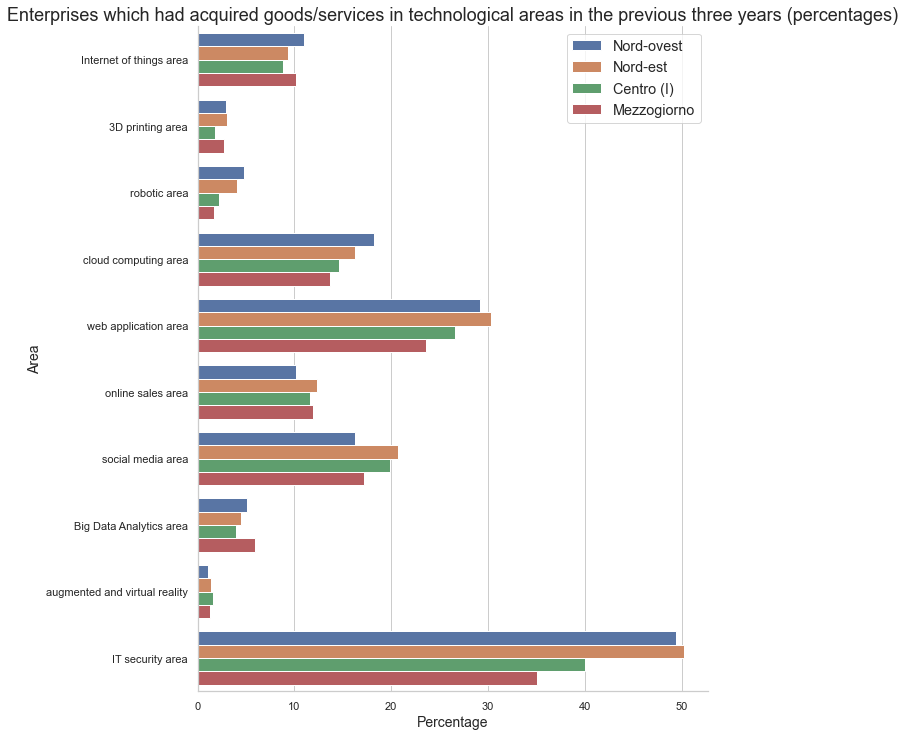

In [269]:
ax = sns.catplot(x='Value', y='Data type', hue='Territory', data=tech_areas_acquired, kind='bar', height=10, aspect=1)
plt.title('Enterprises which had acquired goods/services in technological areas in the previous three years (percentages)', fontsize=18)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Area', fontsize=14)
ax._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')

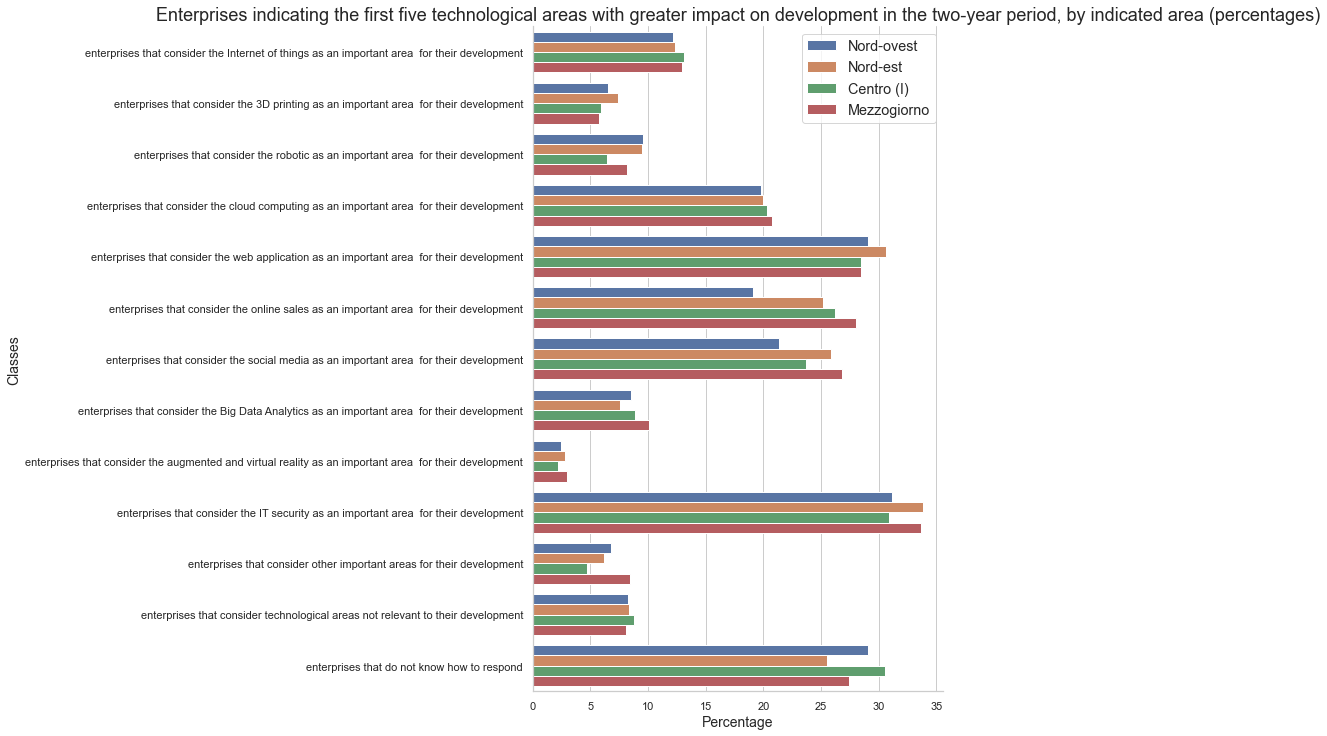

In [270]:
ax = sns.catplot(x='Value', y='Data type', hue='Territory', data=tech_areas_impact, kind='bar', height=10, aspect=1.4)
plt.title('Enterprises indicating the first five technological areas with greater impact on development in the two-year period, by indicated area (percentages)', fontsize=18)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Classes', fontsize=14)
ax._legend.remove()
plt.legend(fontsize='x-large', title_fontsize='40')